## **Projeto Venda de carros usados em SP**


# **Introdução**

Uma concessionária da cidade de São Paulo deseja aumentar a eficiência de vendas de carros usados. O contratante explicou que ao negociar os carros a maioria dos clientes leva em consideração fatores como: Tipo de combustível, quantidade de revendas, câmbio e etc. O mesmo continuou que alguns carros eram mais difíceis de vender devido às características. Sendo assim, requisitou um projeto que indicasse quais carros possuem maior chance de venda e como otimizar a precificação de novos carros baseados nos antigos.

# **Conhecendo a base de dados**

---



---



In [1]:
from google.colab import files
files.upload()


Saving Loca_SP.csv to Loca_SP.csv


{'Loca_SP.csv': b'name,year,buy_price,sell_price,km_driven,fuel,seller_type,transmission,owner\r\nMaruti 800 AC,2007,48201.66719,60000,70000,Petrol,Individual,Manual,First Owner\r\nMaruti Wagon R LXI Minor,2007,118976.7561,135000,50000,Petrol,Individual,Manual,First Owner\r\nHyundai Verna 1.6 SX,2012,483080.7284,600000,100000,Diesel,Individual,Manual,First Owner\r\nDatsun RediGO T Option,2017,215170.4368,250000,46000,Petrol,Individual,Manual,First Owner\r\nHonda Amaze VX i-DTEC,2014,391103.899,450000,141000,Diesel,Individual,Manual,Second Owner\r\nMaruti Alto LX BSIII,2007,125973.1494,140000,125000,Petrol,Individual,Manual,First Owner\r\nHyundai Xcent 1.2 Kappa S,2016,461778.6154,550000,25000,Petrol,Individual,Manual,First Owner\r\nTata Indigo Grand Petrol,2014,215331.3824,240000,60000,Petrol,Individual,Manual,Second Owner\r\nHyundai Creta 1.6 VTVT S,2015,749316.6653,850000,25000,Petrol,Individual,Manual,First Owner\r\nMaruti Celerio Green VXI,2017,308381.8054,365000,78000,CNG,Individu

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dados = pd.read_csv('Loca_SP.csv')
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          4340 non-null   object 
 1   year          4340 non-null   int64  
 2   buy_price     4340 non-null   float64
 3   sell_price    4340 non-null   int64  
 4   km_driven     4340 non-null   int64  
 5   fuel          4340 non-null   object 
 6   seller_type   4340 non-null   object 
 7   transmission  4340 non-null   object 
 8   owner         4340 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 305.3+ KB


In [3]:
dados.head()

,name,year,buy_price,sell_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,48201.66719,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,118976.75610,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,483080.72840,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,215170.43680,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,391103.89900,450000,141000,Diesel,Individual,Manual,Second Owner


# **Limpando e Atalizando a base de dados**

---



---



In [4]:
dados['Age'] = 2020 - dados['year']
dados.drop('year',axis=1, inplace= True)

In [6]:
dados["lucro"] = dados['sell_price'] - dados['buy_price']
range = len(dados['lucro'])

dados['lucro'] = round(dados['lucro'],0)
dados['buy_price'] = round(dados['buy_price'],0)


In [7]:
dados.head()

,name,buy_price,sell_price,km_driven,fuel,seller_type,transmission,owner,Age,lucro
0,Maruti 800 AC,48202.0,60000,70000,Petrol,Individual,Manual,First Owner,13,11798.0
1,Maruti Wagon R LXI Minor,118977.0,135000,50000,Petrol,Individual,Manual,First Owner,13,16023.0
2,Hyundai Verna 1.6 SX,483081.0,600000,100000,Diesel,Individual,Manual,First Owner,8,116919.0
3,Datsun RediGO T Option,215170.0,250000,46000,Petrol,Individual,Manual,First Owner,3,34830.0
4,Honda Amaze VX i-DTEC,391104.0,450000,141000,Diesel,Individual,Manual,Second Owner,6,58896.0


# **Analizando a base de dados**

---



---



# 1. Estudo da frenquência das variáveis Qualitativas

In [14]:
tst = input("Informações sobre qual tabela?    ")

if tst == "owner":
  print(dados['owner'].value_counts())
if tst == "fuel": 
  print(dados['fuel'].value_counts())
if tst == "seller_type":
  print(dados['seller_type'].value_counts())
if tst == "Age":
  print(dados['Age'].value_counts())
if tst == "transmission":
  print(dados['transmission'].value_counts())


Informações sobre qual tabela?    transmission
Manual       3892
Automatic     448
Name: transmission, dtype: int64


IndexError: ignored

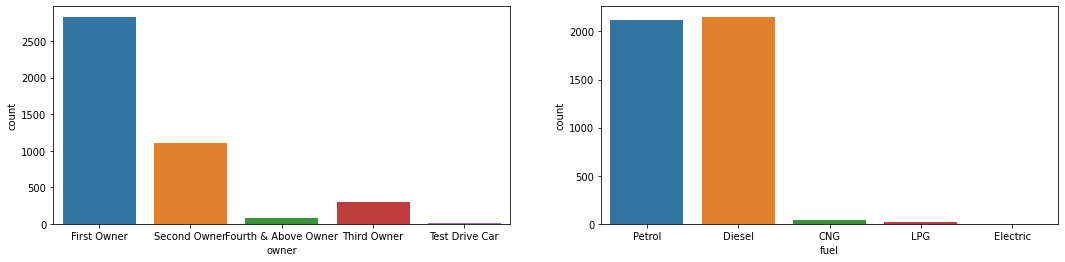

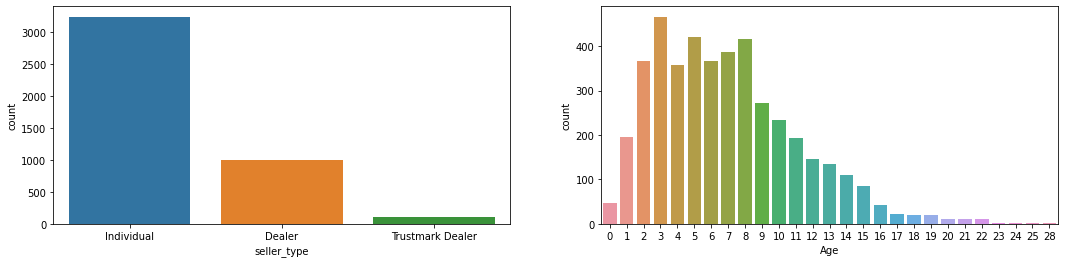

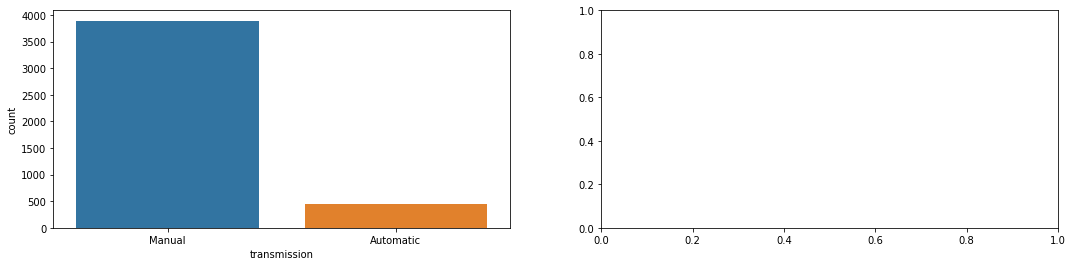

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

print_hist = ['owner','fuel','seller_type','Age','transmission']
i=0
while i < 5:
    fig = plt.figure(figsize=[18,4])

    plt.subplot(1,2,1)
    sns.countplot(x=print_hist[i], data=dados)
    i += 1

    plt.subplot(1,2,2)
    sns.countplot(x=print_hist[i], data=dados)
    i += 1

Pelos histogramas é possível considerar que a maioria dos carros vendidos pela loja vem de um único dono anterior. De maneira similar, a maioria dos carros também foram obtidos de uma compra direta com o antigo dono. Os carros usados usam quase em sua totalidade petrol ou diesel. O tipo de câmbio mais utilizado é o Manual. No que diz respeito à idade dos carros, a faixa que compreende de 2 até 9 foi a que possui mais carros vendidos. 



# 2.   Boxplot das variáveis contínuas



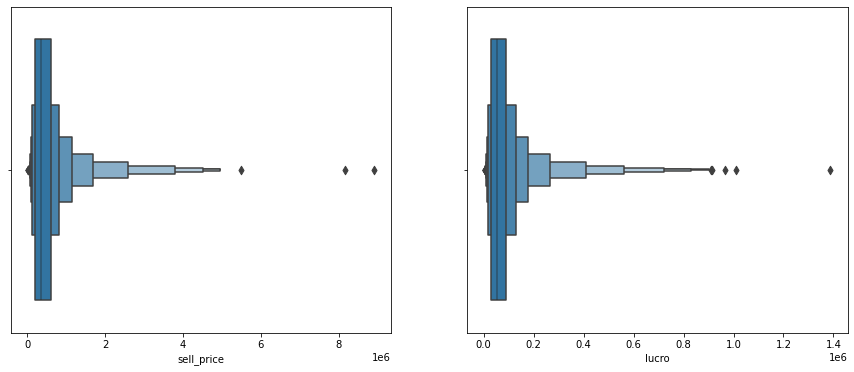

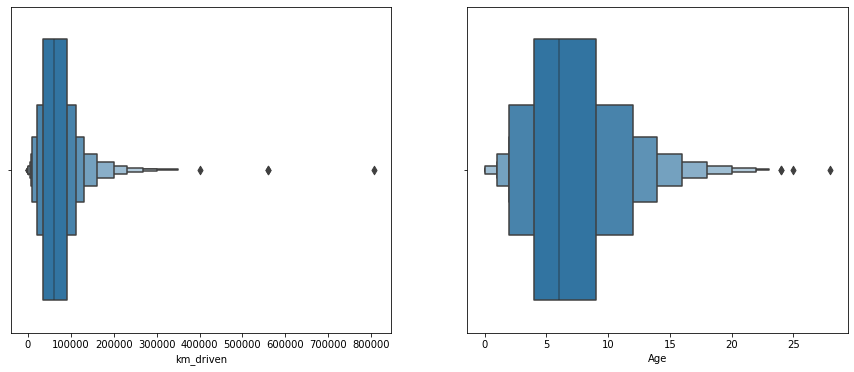

In [9]:
print_box = ['sell_price','lucro','km_driven','Age']
i=0
while i < 4:
    fig = plt.figure(figsize=[15,6])

    plt.subplot(1,2,1)
    sns.boxenplot(x=print_box[i], data=dados)
    i += 1

    plt.subplot(1,2,2)
    sns.boxenplot(x=print_box[i], data=dados)
    i += 1

  A análise dos diagrama de caixa para as variáveis contínuas é importante pois indentifica onde estão presentes a maior parte dos dados em faixas específicas baseadas em quartis.

  Infelizmente existem muitos pontos discrepantes para os dados de sell_price, lucro e km_driven. No entanto, pelo menos 90% dos dados estão entre os limites superiores e inferiores dos diagramas de caixa. Dessa forma, ***pelo menos 90% do lucro da empresa está entre 0.1 1e6 e 1.9 1e6***. Igualmente, pelo menos 90% dos carros vendidos possuem entre 0 e 160 mil km dirigidos. Já a maioria dos carros vendidos possuem entre 0 e 16 anos. 


# 3. Avaliação das condições dos carros comprados

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

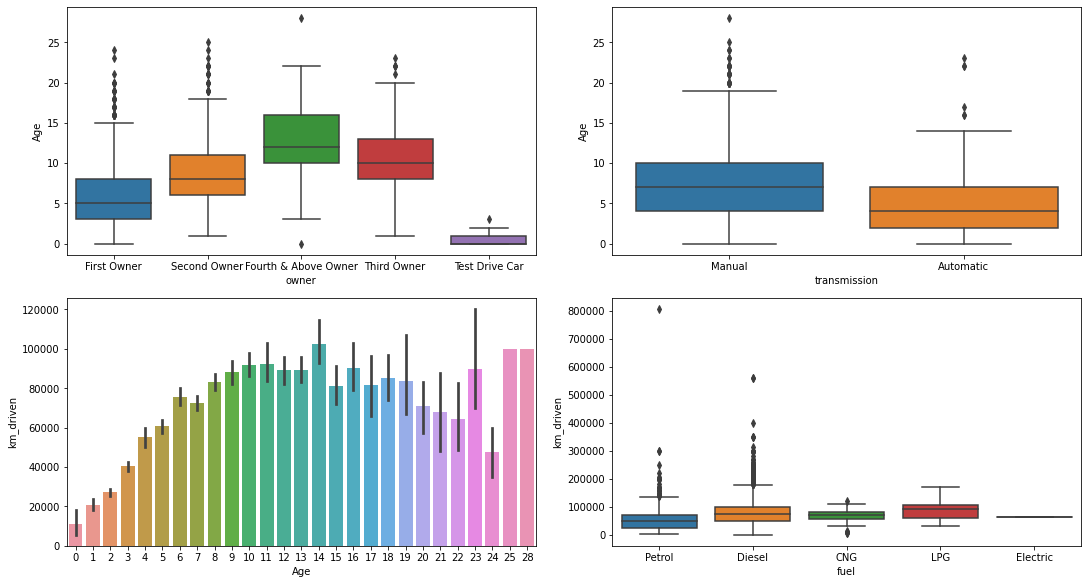

In [10]:
import matplotlib.gridspec as gridspec

fig = plt.figure(constrained_layout=True,figsize=[15,8])
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
f2_ax1 = fig.add_subplot(spec[0, 0])
sns.boxplot(dados['owner'],dados['Age'])
f2_ax2 = fig.add_subplot(spec[0, 1])
sns.boxplot(dados['transmission'],dados['Age'])
f2_ax3 = fig.add_subplot(spec[1, 0])
sns.barplot(dados['Age'],dados['km_driven'])
f2_ax4 = fig.add_subplot(spec[1, 1])
sns.boxplot(dados['fuel'],dados['km_driven'])

plt.show()

> A priemira figura indica que quanto mais antigos donos os carros tiveram, maior é a idade de cada carro. Carros com muitos donos anteriores podem ser menos conservados ***aumentando a dificuldade de venda***.

> Ao analisar a segunda figura conclui-se que carros com câmbio manual tendem a serem mais velhos que carros com câmbio automático, isso pode estar relacionado com o aumento de carros com câmbio automático nos ultimos anos (https://g1.globo.com/carros/noticia/2019/04/11/vendas-de-carros-automaticos-triplicam-em-10-anos-no-brasil.ghtml). Dessa forma, venda de carros com câmbio automáticos ***está em crescimento no mercado***.

> Já a terceirta figura relaciona a idade dos carros com Km percorridos. É possível observar que de 0 até 9 anos de uso a média de km percorridos creace até cerca de 80 mil km.

> Por fim, a figura 4 está relacionada às condições de funcionamento dos motores, visto que, quanto mais km percorridos mais os motores podem apresentar problemas e necessitar de mais manutenções. Veículos que usam CNG, LPG e Diesel percorreram mais km que os carros que usam Petrol. 




# 4. Outras análises estatísticas

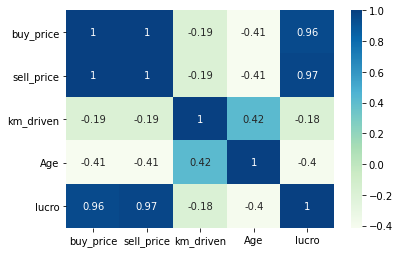

16023.0

In [11]:
sns.heatmap(dados.corr(), annot=True, cmap="GnBu")
plt.show()
dados['lucro'][1]

A figura é um mapa de calor com informações sobre correlação entre as variáveis discretas. 

As correlações entre buy_price, sell_price e lucro são positivas e altas, isso mostra que o preço de venda está relacionado diretamente ao preço de compra por alguma metodologia. 

A relação entre km_driven e buy_price, sell_price e lucro é pequena e negativa, ou seja, tende-se a pensar que quanto mais km rodados, menor será o preço de compra e venda dos carros. No entanto, os coeficientes de correlação próximos a 0 indicam baixa correlação dos valores no geral. 

A idade dos carros aprensenta correlação negativa no valor próximo a -0.4 para buy_price, sell_price e lucro, isso significa que quanto maior a idade, menor será o preço de compra, de revenda e o lucro total. Em relação à km_driven, o coeficiente de correlação é positivo e de valor 0.42. Isso indica que existe uma relação positiva da forma, quanto maior a idade de um carro, maior será a quantidade de km rodados. 

# 5. Análise do Lucro

# 5.1. Análise do Lucro pelas variáveis contínuas (Idade)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


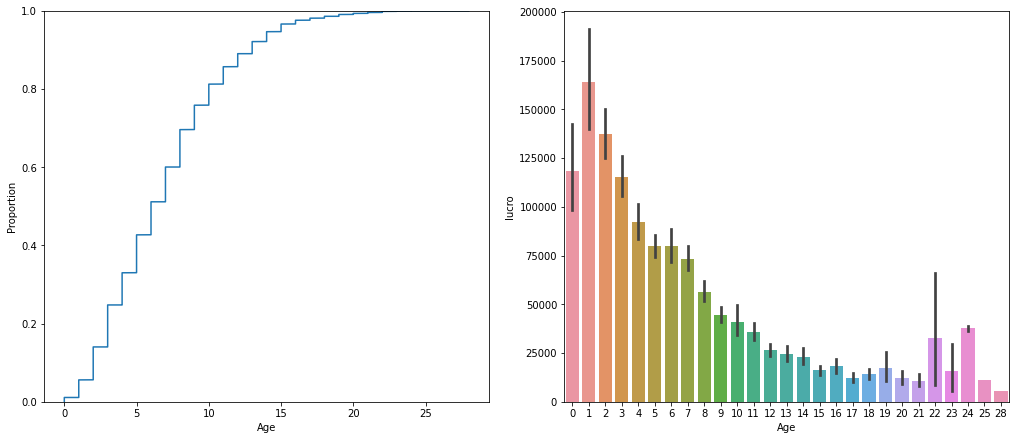

In [ ]:
fig = plt.figure(constrained_layout=True,figsize=[14,6])
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
f_ax1 = fig.add_subplot(spec[0, 0])
sns.ecdfplot(data=dados, x="Age")
f_ax2 = fig.add_subplot(spec[0, 1])
sns.barplot(dados['Age'],dados['lucro'])

A primeira imagem diz respeito à proporção acumuludada da idade de carros de acordo com as respectivas idades. É possível observar na imagem que até carros com até 8 anos representam cerca de 50% do total de carros vendidos. Otimizando, tem-se que carros com até 9 anos representam mais de 80% do total de carros vendidos, ou seja, carros com idade entre a faixa de 10 a 28 anos são menos de 20% do total de carros vendidos pela Concessionária.

A segunda imagem mostra o lucro que a Concessionária obteve em relação à idade dos carros. Observa-se que quanto mais velho o carro, menor é o lucro obtido na venda. Esse valor decresce até a idade efetiva de 9 anos.

Com o intuito de otimizar o lucro a Concessionária deveria dar mais atenção à vendas e compras de carros com até 9 anos de uso.


In [22]:
cont_lucro_age = 0
i=0
while i<len(dados):
  if dados['Age'][i]<10:
    cont_lucro_age += dados['lucro'][i]
  i+=1

print("O lucro de carros com idade até 14 é:   ",cont_lucro_age)
soma = dados['lucro'].sum()
print("O lucro total é:    ",soma)
raz = round((cont_lucro_age/soma)*100, ndigits= 2)
print ("Carros com até 14 anos representam ",raz,"% do lucro total obtido pela Concessionária")


O lucro de carros com idade até 14 é:    301420330.0
O lucro total é:     331354742.0
Carros com até 14 anos representam  90.97 % do lucro total obtido pela Concessionária


Os carros com até 14 anos de uso representam aproximadamente 91% do lucro da empresa, dessa forma, alocar vendedores para vender carros com essas especificações e reduzir a compra destes aumentarão consideravelmente o lucro total da empresa.

Sabe-se que carros mais velhos precisam de mais tempo para venda, nesse caso, os funcionários poderiam focar em carros mais faceis de vender e mais rentáveis para a empresa.



# 5.2. Análise do Lucro pelas variáveis discretas (Combustível, Câmbio)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


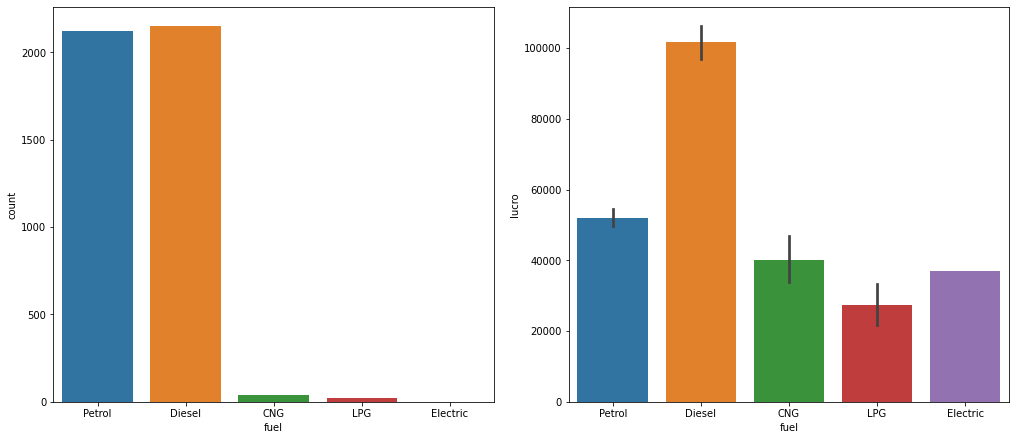

In [12]:
fig = plt.figure(constrained_layout=True,figsize=[14,6])
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
f_ax1 = fig.add_subplot(spec[0, 0])
sns.countplot(dados['fuel'])
f_ax2 = fig.add_subplot(spec[0, 1])
sns.barplot(dados['fuel'],dados['lucro'])

A primeira imagem indica que carros que usam Petrol e Diesel como combustível correspondem à grande maioria dos carros vendiodos, sendo a quantidade de cada um praticamente igual. 

Já a segunda imagem relaciona o lucro médio da venda de cada carro com o combustível utilizado. Sendo Diesel o tipo que obteve mais lucro.

Dessa forma é possível calcular a participação no lucro geral para cada tipo de carro.

In [23]:
cont_lucro_fuel_diesel = 0
cont_lucro_fuel_petrol = 0
i=0
j=0
while i<len(dados):
  if dados['fuel'][i]=="Diesel":
    cont_lucro_fuel_diesel += dados['lucro'][i]
  i+=1
while j<len(dados):
  if dados['fuel'][j] == "Petrol":
    cont_lucro_fuel_petrol += dados['lucro'][j]
  j+=1
  
print("O lucro total de carros que usam Diesel é:   ",cont_lucro_fuel_diesel)
print("O lucro total de carros que usam Petrol é:   ",cont_lucro_fuel_petrol)
raz_petrol = print("A proporção de lucro de carros que usam combustível Petrol é    ",round((cont_lucro_fuel_petrol/soma)*100,ndigits = 2))
raz_diesel = print("A proporção de lucro de carros que usam combustível Diesel é    ",round((cont_lucro_fuel_diesel/soma)*100,ndigits = 2))

O lucro total de carros que usam Diesel é:    218703441.0
O lucro total de carros que usam Petrol é:    110379291.0
A proporção de lucro de carros que usam combustível Petrol é     33.31
A proporção de lucro de carros que usam combustível Diesel é     66.0


Analizando os resultados é possível observar que os carros que usam Diesel como combustível geram mais lucro para a empresa quando comparado a carros que usam Petrol. Além do mais, boa parte do lucro veio de carros que usam diesel como combustível sendo seguido diretamente por carros que usam Petrol como combustível.

Dessa forma, focar a compra de carros usados que usam diesel como combustível é interessante para **aumentar o lucro da empresa**. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


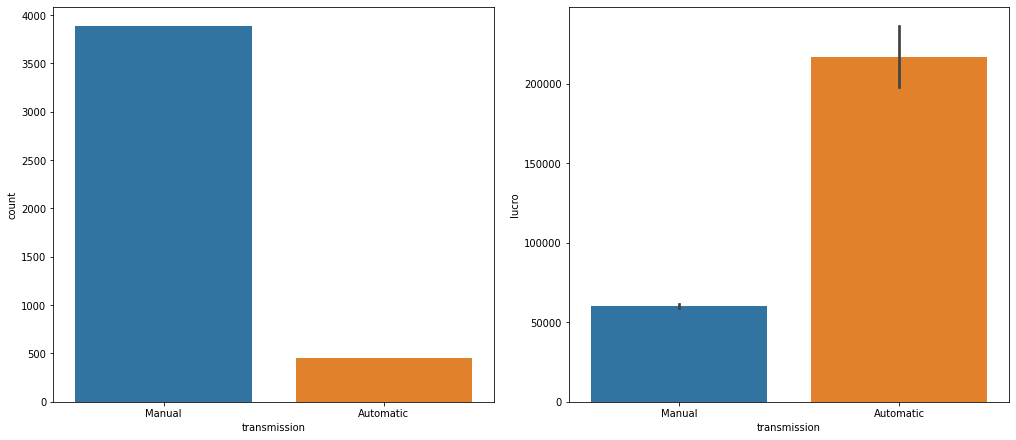

In [13]:
fig = plt.figure(constrained_layout=True,figsize=[14,6])
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
f_ax1 = fig.add_subplot(spec[0, 0])
sns.countplot(dados['transmission'])
f_ax2 = fig.add_subplot(spec[0, 1])
sns.barplot(dados['transmission'],dados['lucro'])

A primeira imagem mostra que aproximadamente 90% dos carros vendidos tinham câmbio manual. Já a segunda imagem indica que em média, os carros que usam câmbio automático obtiveram maior lucro na venda quando comparado aos carros com câmbio manual. 



In [24]:
count_lucro_trans_manual = 0 
count_lucro_trans_auto = 0
i = 0
j=0
while i<len(dados):
  if dados['transmission'][i] == "Manual":
    count_lucro_trans_manual += dados['lucro'][i]
  i+=1
while j<len(dados):
  if dados['transmission'][j] == "Automatic":
    count_lucro_trans_auto += dados['lucro'][j]
  j+=1

print("O lucro total de carros que usam câmbio Manual é:   ",count_lucro_trans_manual)
print("O lucro total de carros que usam câmbiuo Automatic é:   ",count_lucro_trans_auto)
raz_manual = print("A proporção de lucro de carros que usam câmbio Manual é    ",round((count_lucro_trans_manual/soma)*100,ndigits = 2))
raz_automatic = print("A proporção de lucro de carros que usam câmbio Automatic é    ",round((count_lucro_trans_auto/soma)*100,ndigits = 2))

O lucro total de carros que usam câmbio Manual é:    234118123.0
O lucro total de carros que usam câmbiuo Automatic é:    97236619.0
A proporção de lucro de carros que usam câmbio Manual é     70.65
A proporção de lucro de carros que usam câmbio Automatic é     29.35


Analizanado os resultados nota-se que, por mais que 90% dos carros vendidos usem câmbio manual , eles representam apenas 70% do lucro total. sendo assim adiquirir mais carros com câmbio automático pode aumentar consideravelmente o lucro da empresa.



# 6.   Conclusões





A empresa possui uma vasta gama de carros usados para venda, um para cada tipo de comprador. Carros com menos de um ano de uso até carros 28 anos, carros com câmbios manuais ou automáticos, carros que usam Petrol, Diesel, gás ou eletricidade, carros que pertenceram a uma pessoa antes ou até 4. Tudo isso faz com que a LocaSP seja uma empresa grande, abrangente e satisfatória para cada cliente que chegue. 

O lucro da empresa, assim como a satisfação do cliente, deve ser atentada, para isso esse documento propós varias estratégias que podem ser seguidas pela empresa.

Essas estratégias foram criadas na observação dos dados disponibilizados pela LocaSP juntamente com a análise estatística dos mesmos. 